In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math

In [4]:
import random

In [5]:
math.sqrt(4)

2.0

In [6]:
city_list=pd.read_csv('mat-test.txt',sep=" ",header=None)

In [7]:
#City_Order_Std=[]

In [8]:
# for i in range(29):
#      City_Order_Std.append(i)

In [9]:
# City_Order_Std

In [10]:
#1/fitness(City_Order_Std)

In [11]:
def initialisation(pop_size,City_Order_Std):
    City_Population=[]
    City_Population.append(list(City_Order_Std))
    #print(City_Population)
    for i in range(pop_size-1):
        random.shuffle(City_Order_Std)
        City_Population.append(list(City_Order_Std))
        #print(City_Population)
    return City_Population
    

In [12]:
#population=initialisation(100,City_Order_Std)

In [13]:
#population[0]

In [14]:
#pops=[fitness(x) for x in population]
#pops=sorted(pops)


In [15]:
#City_Population

In [16]:
#1/(pops.pop())

In [17]:
city_list.reset_index(drop=True, inplace=True)

In [97]:
#Calculate a table which is filled with distance between cities. 
dist_table=[]
for i in range(len(city_list)):
    temp_list=[]
    for j in range(len(city_list)):
        temp_list.append(dist_calc(city_list.iloc[i,:],city_list.iloc[j,:]))
    dist_table.append(temp_list)

In [98]:
dist_table

[[0.0,
  74.53561415712697,
  4109.913459889123,
  3047.9957068357057,
  2266.911731360042,
  973.5388173508504,
  4190.100799370928,
  3301.893396219811,
  4757.742197606854,
  3044.3481805543315,
  3094.978054490498,
  3986.2611491081325,
  5092.505430095836,
  6406.149567403533,
  5903.388857258176,
  8436.198480292465,
  6962.778000833352,
  6693.612230245258,
  6575.92412964816,
  8009.386876589799,
  7398.462747143098,
  7266.0491359171065,
  7424.952716351918,
  9639.271595117782,
  9229.436602523472,
  8320.273120450367,
  9300.612355885201,
  8102.46875958186,
  7798.69794200043],
 [74.53561415712697,
  0.0,
  4069.7051490249282,
  2999.4907299221477,
  2213.594362117867,
  900.617093380362,
  4137.397248808054,
  3238.5267681119735,
  4701.359128899738,
  2969.8952774279605,
  3020.6695608019695,
  3913.8287768430096,
  5023.749200326167,
  6336.659395844507,
  5828.855408892708,
  8368.359748414794,
  6889.867735950298,
  6619.58374857849,
  6501.495570935113,
  7937.7613899

In [18]:
def dist_calc(C1,C2):
    return math.sqrt((C1[1]-C2[1])**2+(C1[2]-C2[2])**2)
    

In [99]:
dist_calc(city_list.iloc[0,:],city_list.iloc[1,:])

74.53561415712697

In [20]:
city_list.iloc[1,:]

0        2.0000
1    20900.0000
2    17066.6667
Name: 1, dtype: float64

In [21]:
#Genetic Algorithm Skeleton
# def fitness(City_Order):
#     fitval=0
#     for i in range(len(City_Order)-1):
#         fitval=fitval+dist_calc(city_list.iloc[City_Order[i],:],city_list.iloc[City_Order[i+1],:])
#     fitval+=dist_calc(city_list.iloc[City_Order[-1],:],city_list.iloc[City_Order[0],:])
#     return 1/fitval
        
    

In [106]:
def fitness(City_Order):
    fitval=0
    for i in range(len(City_Order)-1):
        fitval=fitval+dist_table[City_Order[i]][City_Order[i+1]]
    fitval+=dist_table[City_Order[-1]][City_Order[0]]
    return 1/fitval


In [22]:
#1/fitness(City_Population[0])

In [23]:
#1/fitness(City_Order_Std)

In [87]:
def Selection(method,fitness_array,k):
    sorted_fitness=sorted(fitness_array,reverse=True)
    if method=='Roulette_Wheel':
        max = sum(fitness_array)
        pick = random.uniform(0, max)
        current = 0
        for i,fitness_values in enumerate(sorted_fitness):
            current += fitness_values
            if current > pick:
                return fitness_array.index(fitness_values)
    else:
        val_best=0
        for i in range(k):
            ind = random.randint(0,len(fitness_array)-1)
            if fitness_array[ind] > val_best:
                best = ind
                val_best=fitness_array[best]
        return best
        
        

        
    

In [68]:
# def Crossover(Father,Mother):
#     i=random.randint(0,len(Father)-1)
#     #j=random.randint(0,len(Mother)-1)
#     son=Father[0:i]
#     for k in range(len(Mother)):
#         if Mother[k] not in son:
#             son.append(Mother[k])
    
#     daughter=Mother[:i]
#     for k in range(len(Father)):
#         if Father[k] not in daughter:
#             daughter.append(Father[k])
#     return son,daughter

In [69]:
def Crossover(Father,Mother):
    i=random.randint(0,len(Father)-1)
    #j=random.randint(0,len(Mother)-1)
    son=Father[0:i]
    for k in range(len(Mother)):
        if Mother[k] not in son:
            son.append(Mother[k])
    
    
#     daughter=Mother[:i]
#     for k in range(len(Father)):
#         if Father[k] not in daughter:
#             daughter.append(Father[k])
    return son#,daughter

In [70]:
def swapPositions(list, pos1, pos2): 
      
    # popping both the elements from list 
    first_ele = list.pop(pos1)    
    second_ele = list.pop(pos2-1) 
     
    # inserting in each others positions 
    list.insert(pos1, second_ele)   
    list.insert(pos2, first_ele)   
      
    return list

In [190]:
import time
pop_size=5000
chrom_len=29
mut_ratio=0.34
cross_ratio=0.65
elite_ratio=0.01
#method='Roulette_Wheel'
method="Tournament Selection"
Tournament_Size=2


In [191]:
#Mother Code:
def TSPGA(pop_size,chrom_len,mut_ratio,cross_ratio,method,Tournament_Size):
    start_time = time.time()
    graph_fitness=[]
    City_Order_Std=[]
    for i in range(len(city_list)):
        City_Order_Std.append(i)
    
    City_Population=initialisation(pop_size,City_Order_Std)
    #print(City_Population[0])
    fitness_array=[fitness(City_Populations) for City_Populations in City_Population]
    #print(1/fitness_array[0])
    itr=0
    while (time.time()-start_time<=300):
        itr+=1
#         if itr%20==0:
#             mut_ratio=mut_ratio+0.03
#             cross_ratio=cross_ratio-0.03
        NextGen_City_population=[]
        print("No .of iterations is " +str(itr))    

        #Do Mating based on Cross OVer after selecting parents using roulette wheel


        while(len(NextGen_City_population)<int(cross_ratio*pop_size)):
                Father=City_Population[Selection(method,fitness_array,Tournament_Size)]
                Mother=City_Population[Selection(method,fitness_array,Tournament_Size)]
#                 son,daughter=Crossover(Father,Mother)
#                 NextGen_City_population.append(son)
#                 NextGen_City_population.append(daughter)
                child=Crossover(Father,Mother)
                NextGen_City_population.append(child)
        #print(NextGen_City_population) 
        #Do Swap Mutation
        
        while(len(NextGen_City_population)<int((cross_ratio+mut_ratio)*pop_size)):
            Parent=City_Population[Selection(method,fitness_array,Tournament_Size)]
            #x=random.randint(0,pop_size-1)
            y=random.randint(0,chrom_len-1)
            z=y
            while(z!=y):
                z=random.randint(0,chrom_len)
            NextGen_City_population.append(swapPositions(Parent,y,z))
        
        #Choose Elite Population:
        elites=sorted(fitness_array)
        #print(1/elites[-1])
        
        while(len(NextGen_City_population)<pop_size):
            NextGen_City_population.append(City_Population[fitness_array.index(elites.pop())])

        fitness_array=[fitness(NextGen_City_populations) for NextGen_City_populations in NextGen_City_population]

        fittest=max(fitness_array)
        #print(1/fittest)
        graph_fitness.append(fittest)

        if fittest>(1/28000):
            print("Hurray")
            return (NextGen_City_population[fitness_array.index(fittest)],graph_fitness)

        City_Population=NextGen_City_population
    return (NextGen_City_population[fitness_array.index(fittest)],graph_fitness)

In [192]:
result,graph_fitness=TSPGA(pop_size,chrom_len,mut_ratio,cross_ratio,method,Tournament_Size)

No .of iterations is 1
No .of iterations is 2
No .of iterations is 3
No .of iterations is 4
No .of iterations is 5
No .of iterations is 6
No .of iterations is 7
No .of iterations is 8
No .of iterations is 9
No .of iterations is 10
No .of iterations is 11
No .of iterations is 12
No .of iterations is 13
No .of iterations is 14
No .of iterations is 15
No .of iterations is 16
No .of iterations is 17
No .of iterations is 18
No .of iterations is 19
No .of iterations is 20
No .of iterations is 21
No .of iterations is 22
No .of iterations is 23
No .of iterations is 24
No .of iterations is 25
No .of iterations is 26
No .of iterations is 27
No .of iterations is 28
No .of iterations is 29
No .of iterations is 30
No .of iterations is 31
No .of iterations is 32
No .of iterations is 33
No .of iterations is 34
No .of iterations is 35
No .of iterations is 36
No .of iterations is 37
No .of iterations is 38
No .of iterations is 39
No .of iterations is 40
No .of iterations is 41
No .of iterations is 42
N

In [197]:
result

[19,
 26,
 24,
 23,
 15,
 8,
 6,
 2,
 3,
 4,
 0,
 1,
 5,
 10,
 9,
 7,
 11,
 12,
 13,
 16,
 17,
 18,
 14,
 21,
 20,
 22,
 28,
 27,
 25]

In [198]:
len(set(result))

29

In [199]:
1/fitness(result)

29554.927000254575

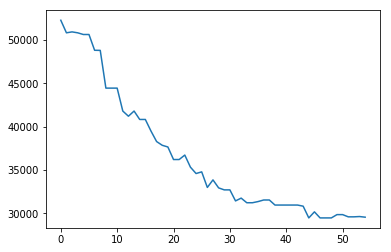

In [200]:
plt.plot(range(len(graph_fitness)), list(map(lambda x:1/x,graph_fitness)))

In [160]:
1/graph_fitness[0]

50684.58851712154